<a href="https://colab.research.google.com/github/Ramki-Rks/My_Python-Code/blob/main/Self_Project_Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

In [ ]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Module 4/Assignment/Assignment_Data/Copy of CAR DETAILS FROM CAR DEKHO.csv")

In [ ]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
dataset.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [ ]:
dataset.shape

(4340, 8)

In [ ]:
dataset.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
dataset.owner.value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [ ]:
len(dataset[dataset.duplicated()])

763

In [ ]:
#duplicated key
(dataset[dataset.duplicated()])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


In [ ]:
df=dataset.drop_duplicates().copy()

In [ ]:
df.shape

(3577, 8)

In [ ]:
df["selling_price"]

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 3577, dtype: int64

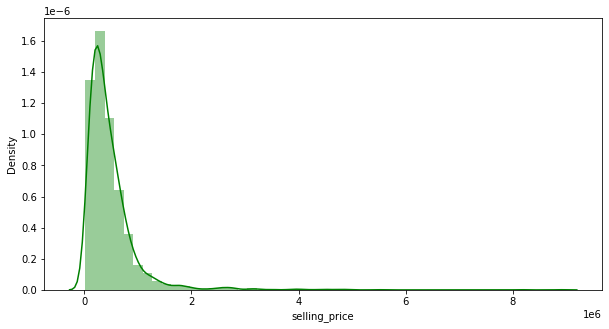

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df["selling_price"],color="g")

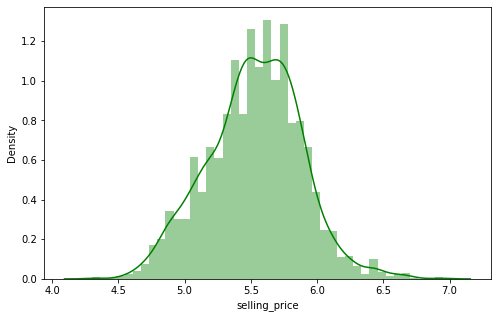

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(np.log10(df["selling_price"]),color="g")

In [ ]:
numeric_features=df.describe().columns

In [ ]:
numeric_features

Index(['year', 'selling_price', 'km_driven'], dtype='object')

In [ ]:
df["year"].value_counts()

2017    346
2012    338
2015    332
2014    321
2013    298
2018    295
2016    283
2011    247
2010    210
2009    169
2019    162
2008    129
2007    117
2006     93
2005     61
2020     45
2004     38
2003     22
2002     18
2001     16
2000     12
1998      9
1999      9
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64

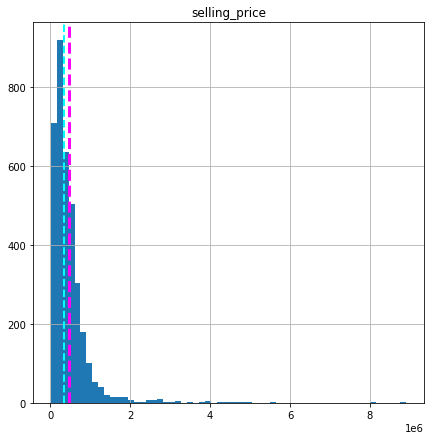

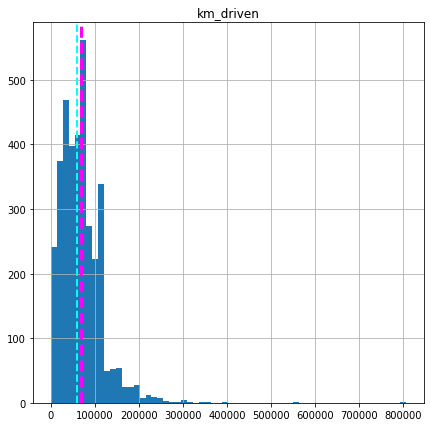

In [ ]:
#plotting all numerical type columns
for column in numeric_features[1:]:
  fig=plt.figure(figsize=(7,7))
  ax=fig.gca()
  features=df[column]
  features.hist(bins=60, ax=ax)
  ax.axvline(features.mean(), color='magenta', linestyle='dashed', linewidth=3)
  ax.axvline(features.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(column)
plt.show()

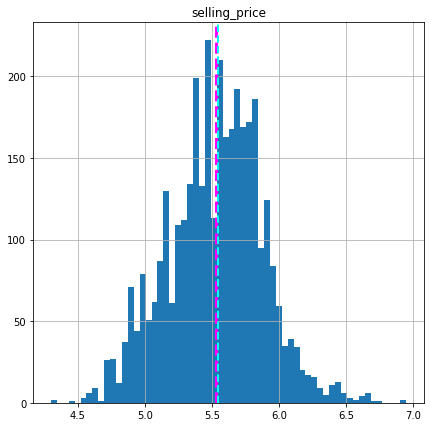

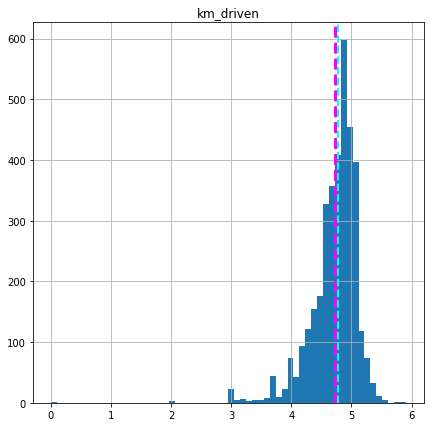

In [ ]:
#plotting numerial feature ion log scale

for column in numeric_features[1:]:
  fig=plt.figure(figsize=(7,7))
  ax=fig.gca()
  features=np.log10(df[column])
  features.hist(bins=60, ax=ax)
  ax.axvline(features.mean(), color='magenta', linestyle='dashed', linewidth=3)
  ax.axvline(features.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(column)
plt.show()

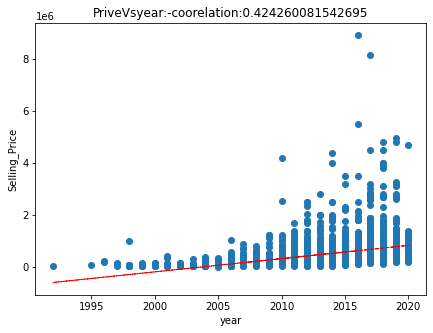

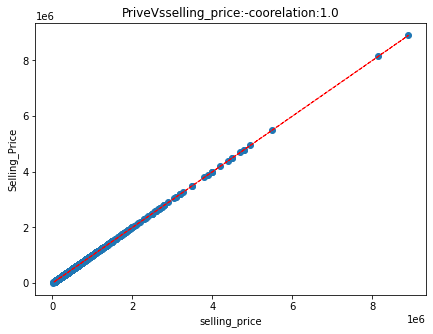

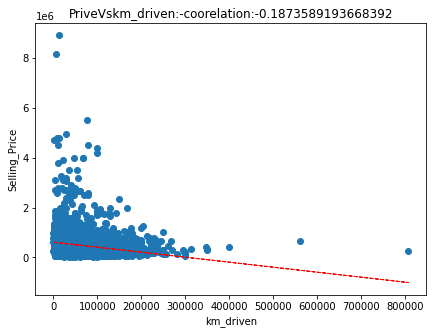

In [ ]:
for col in numeric_features:
  fig=plt.figure(figsize=(7,5))
  ax=fig.gca()
  features=df[col]
  label=df["selling_price"]
  correlation=features.corr(label)
  plt.scatter(x=features, y=label)
  plt.xlabel(col)
  plt.ylabel("Selling_Price")
  plt.title("Prive"+ "Vs"+ col+":-coorelation:" + str(correlation))
  z = np.polyfit(df[col], df['selling_price'], 1)
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col], y_hat, "r--", lw=1)
plt.show()


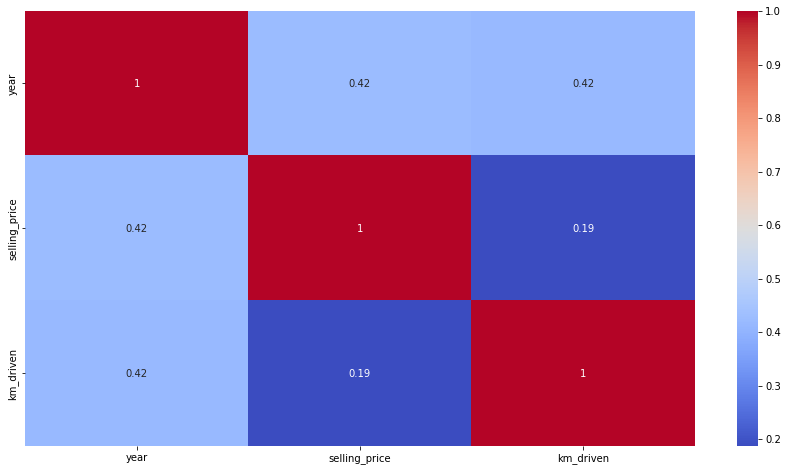

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['selling_price']]])

,variables,VIF
0,year,3.110934
1,km_driven,3.110934


In [ ]:
numerical_features=["year","km_driven"]

In [ ]:
categorical_features = df.describe(include=['object','category']).columns
categorical_features

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [ ]:
df['car_name'] = df['name'].str.split(" ", expand=True)[0]


In [ ]:

df['car_name'].value_counts()

Maruti           1072
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            170
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Fiat               32
Audi               31
Datsun             29
BMW                25
Mercedes-Benz      21
Jaguar              5
Mitsubishi          5
Land                5
Volvo               4
Jeep                3
Ambassador          3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: car_name, dtype: int64

In [ ]:
mm="Maruti Wagon R Lxi Minor"
mm.split(" ")[0]

'Maruti'

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_name
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [ ]:
df["selling_price"].value_counts()

300000     137
250000     112
350000     106
500000      87
600000      84
          ... 
2595000      1
368000       1
248000       1
641000       1
865000       1
Name: selling_price, Length: 445, dtype: int64

In [ ]:
categorical_features = df.describe(include=['object','category']).columns
categorical_features

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'car_name'], dtype='object')

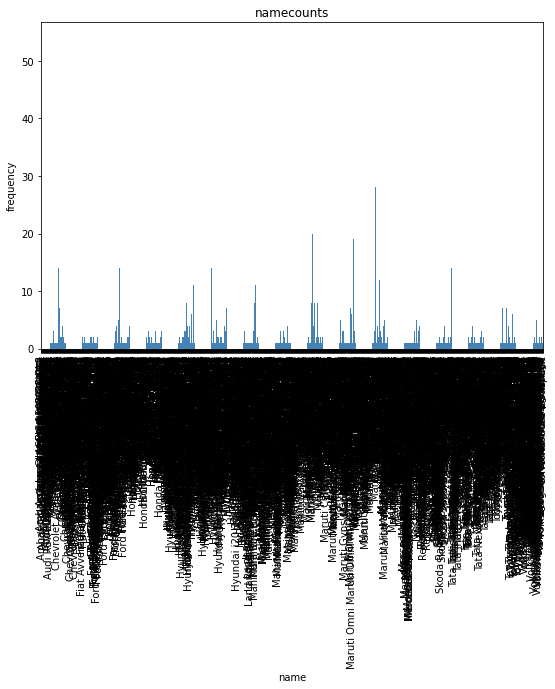

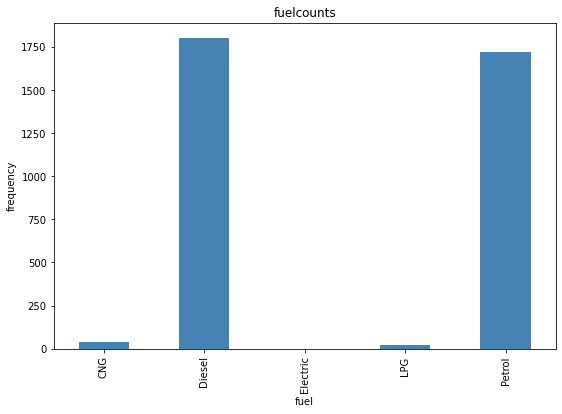

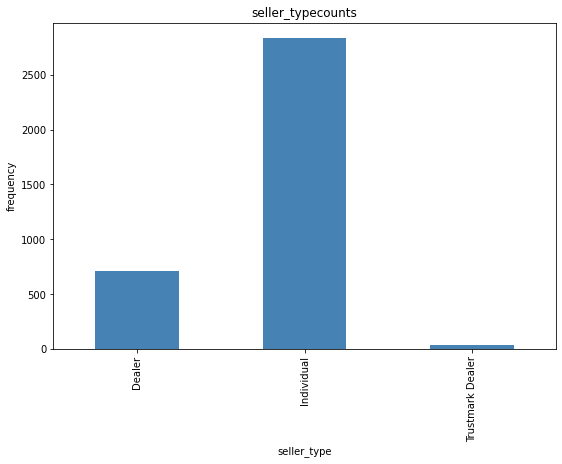

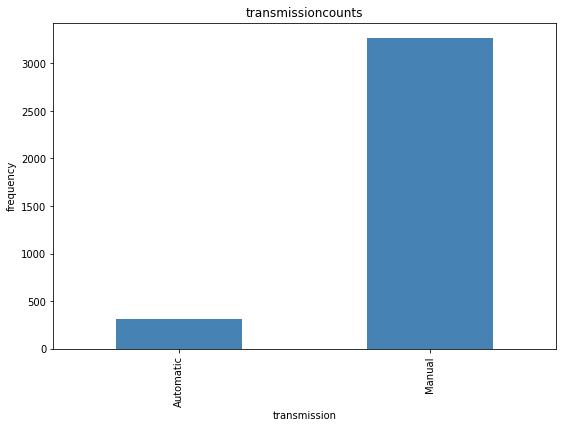

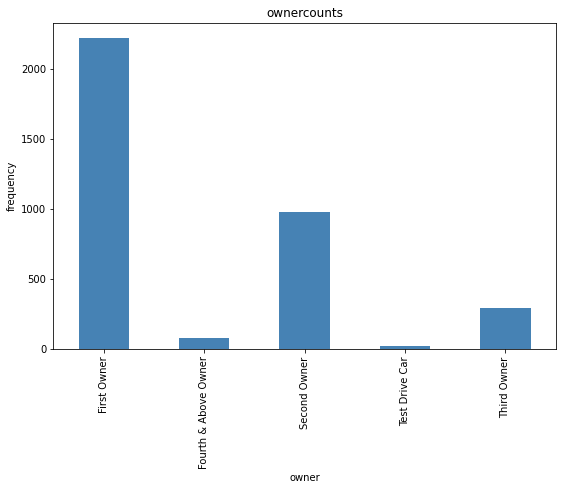

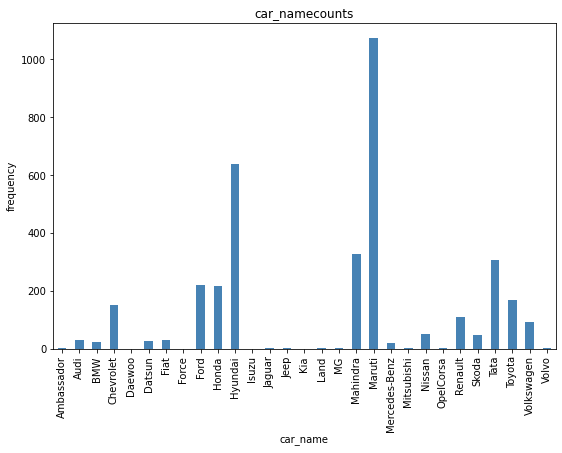

In [ ]:
for col in categorical_features:
  counts=df[col].value_counts().sort_index()
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  counts.plot.bar(ax = ax, color='steelblue')
  plt.xlabel(col)
  plt.ylabel("frequency")
  plt.title(col + "counts")

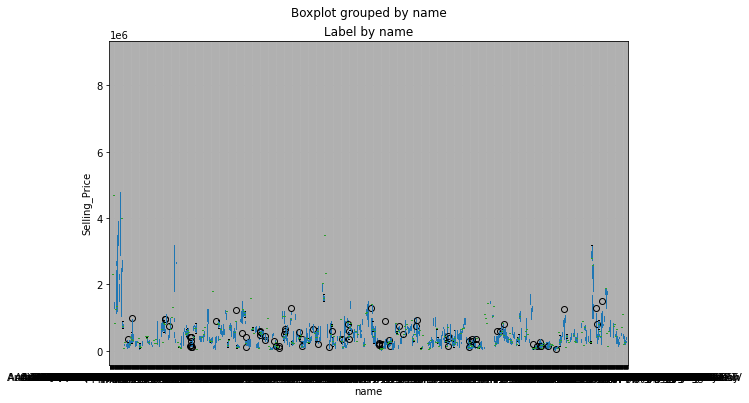

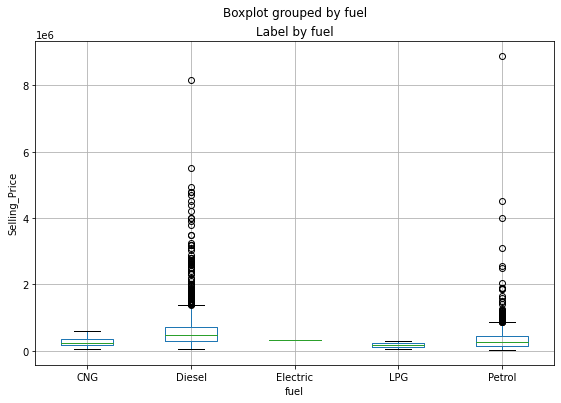

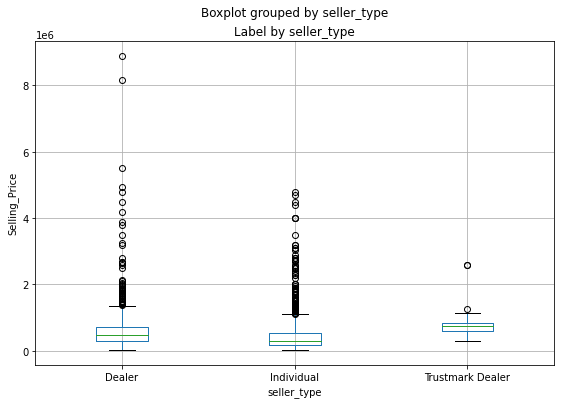

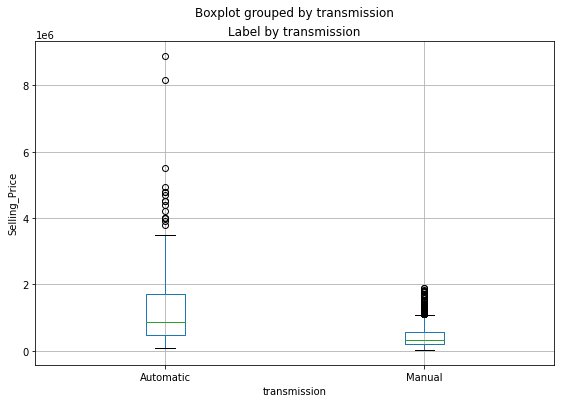

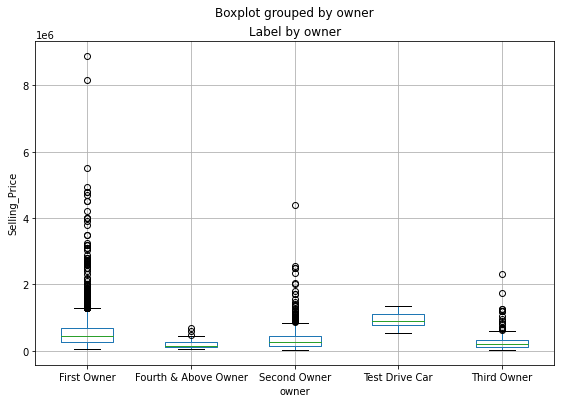

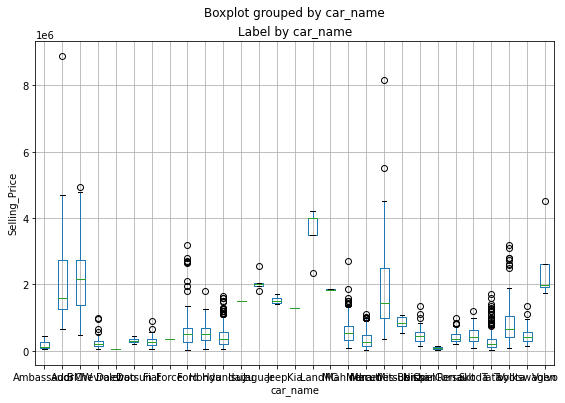

In [ ]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'selling_price', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Selling_Price")
plt.show()

<Figure size 648x432 with 0 Axes>

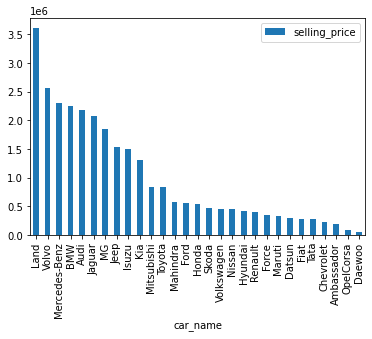

In [ ]:
plt.figure(figsize=(9,6))
df_autox=pd.DataFrame(df.groupby(["car_name"])["selling_price"].mean().sort_values(ascending=False))
df_autox.plot.bar()

In [ ]:
df_autox

,selling_price
car_name,
Land,3.609800e+06
Volvo,2.556250e+06
Mercedes-Benz,2.299238e+06
BMW,2.242800e+06
Audi,2.185452e+06
Jaguar,2.073000e+06
MG,1.842500e+06
Jeep,1.530000e+06
Isuzu,1.500000e+06


In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'car_name'],
      dtype='object')

In [ ]:
df.rename(columns={'selling_price_x':'selling_price'},inplace=True)

In [ ]:
df_autox.rename(columns={'selling_price':'mean_price'},inplace=True)

In [ ]:
df_autox.head()

,mean_price
car_name,
Land,3.609800e+06
Volvo,2.556250e+06
Mercedes-Benz,2.299238e+06
BMW,2.242800e+06
Audi,2.185452e+06


In [ ]:
df = df.merge(df_autox,on = 'car_name',how = 'left')
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'car_name', 'mean_price'],
      dtype='object')

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_name,mean_price
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,332031.213619
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,332031.213619
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,413340.612245
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,296551.655172
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,539944.398148


In [ ]:
df.sort_values('mean_price', ascending=False)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_name,mean_price
949,Land Rover Discovery Sport SD4 HSE Luxury,2016,3500000,53000,Diesel,Dealer,Automatic,First Owner,Land,3609800.0
655,Land Rover Discovery Sport TD4 HSE 7S,2018,4000000,68000,Diesel,Individual,Automatic,First Owner,Land,3609800.0
3018,Land Rover Range Rover Evoque 2.2L Dynamic,2012,2349000,149000,Diesel,Individual,Automatic,Second Owner,Land,3609800.0
871,Land Rover Discovery S 2.0 SD4,2018,4000000,68000,Petrol,Individual,Automatic,First Owner,Land,3609800.0
3260,Land Rover Range Rover 4.4 Diesel LWB Vogue SE,2010,4200000,100000,Diesel,Dealer,Automatic,First Owner,Land,3609800.0
...,...,...,...,...,...,...,...,...,...,...
3287,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner,Ambassador,200000.0
2893,Ambassador Grand 1800 ISZ MPFI PW CL,2012,430000,50000,Petrol,Individual,Manual,Second Owner,Ambassador,200000.0
1935,OpelCorsa 1.6Gls,2004,142000,73000,Petrol,Individual,Manual,Fourth & Above Owner,OpelCorsa,88500.0
2696,OpelCorsa 1.4 GL,2002,35000,100000,Petrol,Individual,Manual,Third Owner,OpelCorsa,88500.0


In [ ]:
df["selling_price_y"].max()

3609800.0

In [ ]:
df["selling_price_y"].min()

60000.0

In [ ]:
df['car_company_cat'] = df['mean_price'].apply(lambda x : 0 if x < 1200000 else (1 if 1200000 <= x < 2400000 else 2))

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_name,mean_price,car_company_cat
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,332031.213619,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,332031.213619,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,413340.612245,0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,296551.655172,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,539944.398148,0


In [ ]:
df["car_company_cat"].value_counts()

0    3479
1      89
2       9
Name: car_company_cat, dtype: int64

In [ ]:
correlation.selling_price

year             0.424260
selling_price    1.000000
km_driven       -0.187359
Name: selling_price, dtype: float64

In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'car_name', 'mean_price', 'car_company_cat'],
      dtype='object')

In [ ]:
df1=df.copy()

In [ ]:
df1["fuel"].value_counts()

Diesel      1800
Petrol      1717
CNG           37
LPG           22
Electric       1
Name: fuel, dtype: int64

In [ ]:
### Data encoding
#label encoding
encoders_nums = {"seller_type":{"Individual":1,"Dealer":0,"Trustmark Dealer":0},
                 "transmission":{"Manual":1,"Automatic":0},
                 "owner":{"First Owner": 1, "Second Owner": 0,"Third Owner":0,"Fourth & Above Owner":0,"Test Drive Car":0}
                 }

df1 = df1.replace(encoders_nums)

In [ ]:
encoders_nums1 = {"fuel":{"Diesel":1,"Petrol":0,"CNG":0,"LPG":0,"Electric":0}}

df1 = df1.replace(encoders_nums1)

In [ ]:
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_name,mean_price,car_company_cat
0,Maruti 800 AC,2007,60000,70000,0,1,1,1,Maruti,332031.213619,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,1,1,Maruti,332031.213619,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,1,Hyundai,413340.612245,0
3,Datsun RediGO T Option,2017,250000,46000,0,1,1,1,Datsun,296551.655172,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,0,Honda,539944.398148,0


In [ ]:
df1.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'car_name', 'mean_price', 'car_company_cat'],
      dtype='object')

In [ ]:
features=['km_driven', 'fuel', 'seller_type',
       'transmission', 'owner','car_company_cat']

In [ ]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = df1[features].apply(zscore)

In [ ]:
Y = np.log10(df1['selling_price'])

In [ ]:
#apply linear regression
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(2861, 6)
(716, 6)


In [ ]:
reg = LinearRegression().fit(x_train, y_train)

In [ ]:
reg.score(x_train, y_train)

0.45777646188031007

In [ ]:
reg.coef_

array([-0.09501761,  0.15692331, -0.03136593, -0.07839387,  0.07889934,
        0.06056051])

In [ ]:
reg.intercept_

5.527551721115636

In [ ]:
y_pred = reg.predict(x_test)

In [ ]:
y_pred[:10]

array([5.41369405, 5.67362035, 5.83874286, 5.61370167, 5.4910919 ,
       5.55101057, 5.47960459, 5.30706259, 5.73353902, 5.13729301])

In [ ]:
y_train[:10]

2771    5.079181
1505    5.720159
3028    5.477121
3102    5.176091
1428    5.845098
2       5.778151
3576    5.352183
70      5.812913
2096    5.000000
527     5.880814
Name: selling_price, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 71018787732.23734
RMSE : 266493.50410889444


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

R2 : 0.6533808448849607
Adjusted R2 :  0.6504475375074005


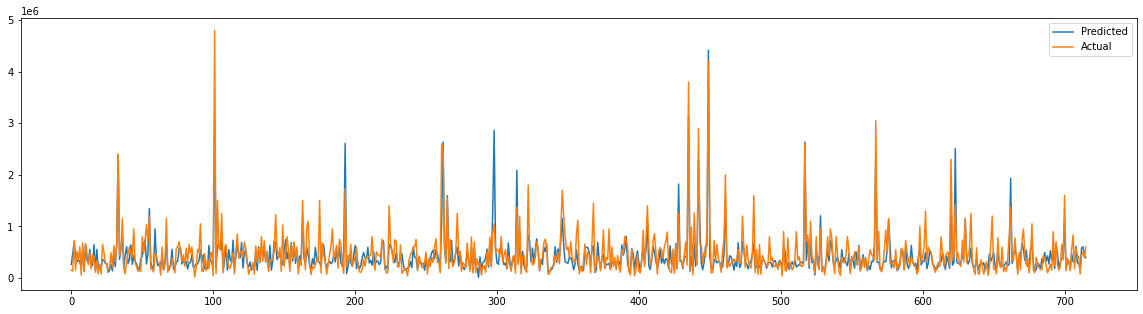

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(x_train, y_train)

0.45777610538649804

In [ ]:
lasso.coef_

array([-0.09490087,  0.15679331, -0.03130828, -0.07834707,  0.07885221,
        0.0605046 ])

In [ ]:
reg.coef_

array([-0.09501761,  0.15692331, -0.03136593, -0.07839387,  0.07889934,
        0.06056051])

In [ ]:
for i in range(4):
  print(*(*i).center(4-i," "))

SyntaxError: ignored